In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv
import seaborn as sns
# sk-learn imports
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
%matplotlib inline

In [2]:
data = pd.read_csv("train_Df64byy.csv", index_col=False)
original_data = pd.read_csv("train_Df64byy.csv", index_col=False)

## Checking Features - NaNs, High correlations, etc.

In [3]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### No. of samples

In [4]:
print(len(data))

50882


### What are these features?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

### Examples:

Health_Indicator: unique values, normalized counts

In [6]:
data['Health Indicator'].value_counts(dropna=False,normalize=True)

X1     0.255690
NaN    0.229767
X2     0.203058
X3     0.132896
X4     0.112869
X5     0.033941
X6     0.025156
X7     0.003852
X8     0.001533
X9     0.001238
Name: Health Indicator, dtype: float64

Holding_Policy_Duration: unique values, normalized counts

In [7]:
data.rename(columns={'Health Indicator':'Health_Indicator'},inplace=True)

In [8]:
data['Holding_Policy_Duration'].value_counts(dropna=False,normalize=True)

NaN     0.397999
1.0     0.088420
14+     0.085197
2.0     0.083723
3.0     0.070477
4.0     0.054459
5.0     0.046421
6.0     0.037223
7.0     0.032330
8.0     0.025864
9.0     0.021894
10.0    0.015978
11.0    0.010731
12.0    0.010082
13.0    0.010043
14.0    0.009158
Name: Holding_Policy_Duration, dtype: float64

Holding_Policy_Type: unique values, normalized counts

In [9]:
data['Holding_Policy_Type'].value_counts(dropna=False,normalize=True)

NaN    0.397999
3.0    0.260976
1.0    0.160627
2.0    0.098365
4.0    0.082033
Name: Holding_Policy_Type, dtype: float64

### Checking Labels 

In [10]:
data['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

### Manipulating categorical features for regression

#### Function: Frequency Calculator for any categorical variable

In [11]:
def frequency(df,x):
    x=str(x)
    d=df[x].value_counts(dropna=False,normalize=True).to_dict()
    d.update((x, np.round(y,2)) for x, y in d.items())
    d[np.nan]=np.nan
    return d

### Function: Prediction Information

In [12]:
def pred_info(y_pred, y_test):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("\nF1 Score: ", f1_score(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    cm = cm/len(y_test)
    print("\nConfusion Matrix: ")
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

In [13]:
data.replace({"City_Code": frequency(data,'City_Code')},inplace=True)
data.replace({"Accomodation_Type": frequency(data,'Accomodation_Type')},inplace=True)
data.replace({"Reco_Insurance_Type": frequency(data,'Reco_Insurance_Type')},inplace=True)
data.replace({"Is_Spouse": frequency(data,'Is_Spouse')},inplace=True)
data.replace({"Health_Indicator": frequency(data,'Health_Indicator')},inplace=True)
data.replace({"Holding_Policy_Duration": frequency(data,'Holding_Policy_Duration')},inplace=True)
data.replace({"Reco_Policy_Cat": frequency(data,'Reco_Policy_Cat')},inplace=True)
data.replace({"Holding_Policy_Type": frequency(data,'Holding_Policy_Type')},inplace=True)
# Region Code - replaced with frequency
data.replace({"Region_Code": frequency(data,'Region_Code')},inplace=True)

Standardizing the continuous features

In [14]:
# Initialise the Scaler 
scaler = StandardScaler() 
# To scale data 
data.iloc[:,[5,6,12]]=scaler.fit_transform(data.iloc[:,[5,6,12]])

In [15]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,0.10,0.0,0.45,0.8,-0.511625,-0.389098,0.83,0.26,0.09,0.26,0.13,-0.387852,0
1,2,0.03,0.0,0.55,0.2,1.741395,-1.197449,0.83,0.20,NaN,NaN,0.13,2.477394,0
2,3,0.03,0.0,0.55,0.8,-0.742704,-0.620055,0.83,NaN,0.09,0.16,0.07,-1.021842,1
3,4,0.01,0.0,0.55,0.2,0.412691,0.303775,0.83,0.26,0.09,0.26,0.07,0.545682,0
4,5,0.04,0.0,0.45,0.8,-0.049467,0.072817,0.83,0.20,0.07,0.16,0.08,-0.573588,0


### Checking Region_Code because of zeros

In [16]:
data['Region_Code'].value_counts(dropna=False,normalize=True)

0.0    1.0
Name: Region_Code, dtype: float64

This is because of the large variance in the the variable. This is seen when we check the non-manipulated data

In [17]:
original_data['Region_Code'].value_counts(dropna=False,normalize=True)

1       0.001887
5       0.001474
2       0.001435
6       0.001435
4       0.001435
          ...   
5548    0.000020
5671    0.000020
5639    0.000020
5686    0.000020
5524    0.000020
Name: Region_Code, Length: 5316, dtype: float64

#### So we drop the 'Region_Code' altogether.

### Dropping column 'ID' - not relevant for prediction

In [18]:
data = data.drop(['ID', 'Region_Code'], axis=1)

### Checking Correlations

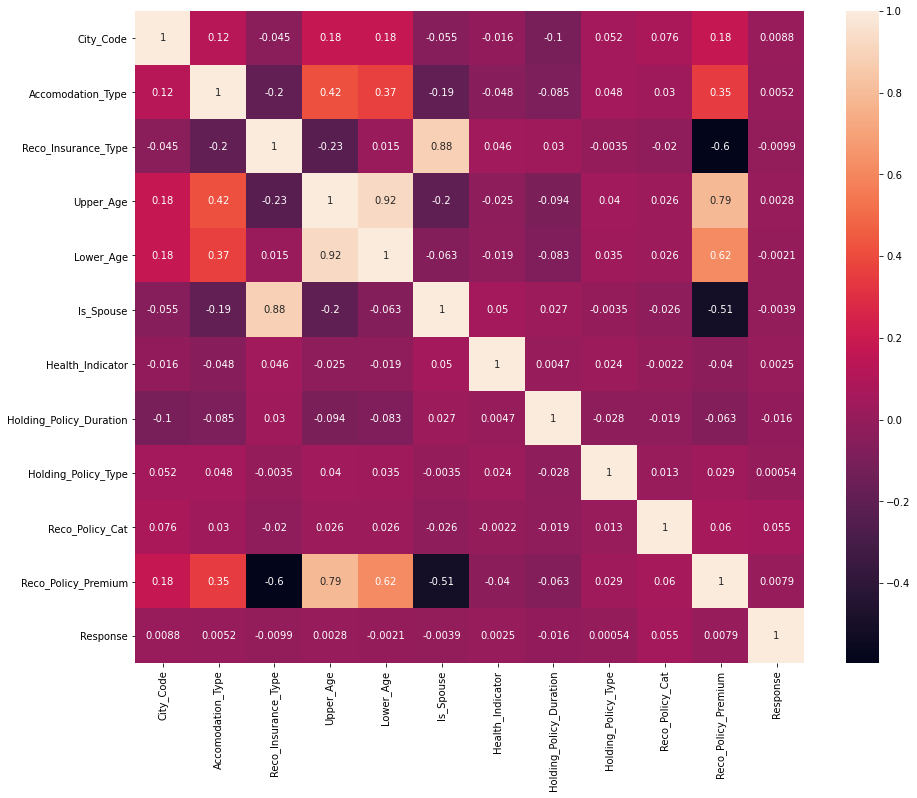

In [19]:
corrMat = data.corr()

fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(corrMat, annot=True)
plt.show()

#### We drop highly correlated variables, > 0.8 - {Lower_Age - Upper_Age}, {Is_Spouse - Reco_Insurance_Type}

#### We drop the former of both.

In [20]:
data = data.drop(['Lower_Age', 'Is_Spouse'], axis=1)

### Checking for NaN values in each columns

In [21]:
data.isna().sum()

City_Code                      0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

## BASELINE - CALCULATED WITH OUT NaN VALUES 

### Dropping NaN rows

In [22]:
df = data.dropna()

### Separating labels

In [23]:
y_vec = np.asarray(df['Response']) 
df = df.drop(['Response'], axis=1)

In [24]:
X_vec = df.to_numpy()

In [25]:
itx, n_count = np.unique(y_vec, return_counts=True)

print("Y_test distribution\n------------------")
for idx in range(itx.shape[0]):
    print(itx[idx], ": ", n_count[idx])

Y_test distribution
------------------
0 :  17848
1 :  5700


Train-test split, model training

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.1)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

Prediction Information

Accuracy:  0.7507430997876858
Recall:  0.0

F1 Score:  0.0

Confusion Matrix: 


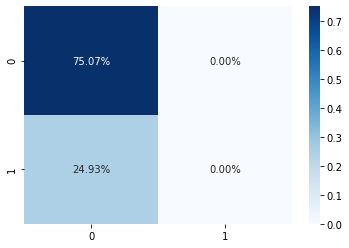

In [27]:
pred_info(y_pred, y_test)

In [28]:
itx, n_count = np.unique(y_test, return_counts=True)
itx_pred, n_pred_count = np.unique(y_pred, return_counts=True)

print("Y_test distribution\n--------------------")
for idx in range(itx.shape[0]):
    print(itx[idx], ": ", n_count[idx])
print("\n")
print("Y_pred distribution\n--------------------")
for idx in range(itx_pred.shape[0]):
    print(itx_pred[idx], ": ", n_pred_count[idx])

Y_test distribution
--------------------
0 :  1768
1 :  587


Y_pred distribution
--------------------
0 :  2355


## Dealing with NaNs

### Separating labels

In [29]:
y_vec = np.asarray(data['Response']) 
data = data.drop(['Response'], axis=1)

### Imputing missing values

In [30]:
df = data.values
ix = [i for i in range(df.shape[1])]
X = df[:, ix]

# print total missing
print('(start) No. of NaNs in the data: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
X_vec = imputer.transform(X)
# print total missing
print('( end ) No. of NaNs in the data: %d' % sum(isnan(X_vec).flatten()))

(start) No. of NaNs in the data: 52193
( end ) No. of NaNs in the data: 0


In [31]:
X_vec = pd.DataFrame(X_vec)

### the obvious, train-test split of data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, test_size=0.2)

### Model Training

In [33]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

### Prediction Information: Accuracy, confusion matrix

In [34]:
y_pred = classifier.predict(X_test)

Accuracy:  0.7656480298712783
Recall:  0.0

F1 Score:  0.0

Confusion Matrix: 


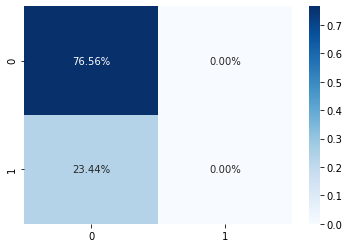

In [35]:
pred_info(y_pred, y_test)

### This is bad classfier - it does not learn the true class (label=1) well.

This is probably because of the imbalance in the dataset and logistic regression models are not good at capturing information from imbalanced datasets.

In [36]:
itx, n_count = np.unique(y_test, return_counts=True)
itx_pred, n_pred_count = np.unique(y_pred, return_counts=True)

print("Y_test dist\n--------------")
for idx in range(itx.shape[0]):
    print(itx[idx], ": ", n_count[idx])
print("\n")
print("Y_pred dist\n--------------")
for idx in range(itx_pred.shape[0]):
    print(itx_pred[idx], ": ", n_pred_count[idx])

Y_test dist
--------------
0 :  7792
1 :  2385


Y_pred dist
--------------
0 :  10177


### Trying Decision Trees - RandomForestClassifier from scikit-learn

Decision Trees generlaly perform well on imbalanced data

In [37]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_vec, y_vec)

rfc_yPred = rfc.predict(X_test)

Accuracy:  0.9720939373096197
Recall:  0.8834381551362683

F1 Score:  0.9368608270342375

Confusion Matrix: 


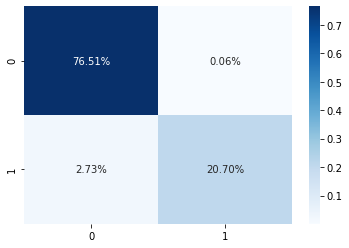

In [38]:
pred_info(rfc_yPred, y_test)

### Possible Directions:

- Undersampling to get Logistic Regression accuracy up
- Hyperparameter tuning for RandomForestClassifier
- Commenting on accuracies of various models
- Trying other models, maybe?

For simple classifiers using linear regression, such as logistic regression, the performance is almost certainly bad when faced with an unbalanced problem.This is because, in training, the model is looking for a hyperplane that makes misclassification least.As a result, the model sorts all samples into most label.

AUC: 1.00


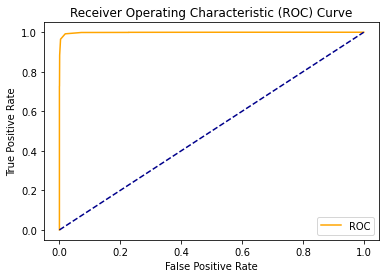

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr) 